In [1]:
from classes import *
import SessionState
from sklearn.manifold import TSNE

# all plot with size = [20,16]
plt.rcParams['figure.figsize'] = [20, 16]

In [2]:

"""
Simulation parameters
"""
p_sim = {}
p_sim['n_samples'] = 1000
p_sim['n_features'] = 25
#p_sim['beta'] = [0.01 * (p_sim['n_features'] - i) / p_sim['n_features'] for i in range(0, p_sim['n_features'])]


idx = np.arange( p_sim['n_features'])
#beta = (-1) ** idx * np.exp(-idx/ 10.)
#beta_norm = np.linalg.norm(beta)
#p_beta = 1.
p_sim['beta'] = (-1) ** idx * np.exp(-idx/ 10.)#p_beta * beta # / beta_norm
# select five 5 features
#p_sim['beta'] = np.array([0.1, -0.1, 0.1, -0.1, 0.1,0.1]+[0.]*(p_sim['n_features']-6))


p_sim['alpha'] = 2#1
p_sim['lamb'] = 1
p_sim['coef_tt'] = .8
p_sim['rho'] =1 # 0.2
p_sim['kappa'] = 3.
p_sim['wd_param'] = 2. #4. # 40



p_sim['path_data'] = "./sim_surv"

"""
Model parameters
"""

p_survcaus = {}
p_survcaus['num_durations'] = 25
p_survcaus['encoded_features'] = 20
p_survcaus['alpha_wass'] = 1
p_survcaus['batch_size'] = 256
p_survcaus['epochs'] = 100
p_survcaus['lr'] = 1e-2
p_survcaus['patience'] = 10

nep = Neptune("test")
nep.create_experiment()
# send parameters to neptune
nep.send_dict(p_sim, "p_sim",num_run=0)


2021-11-21 20:38:11.347 WARNING neptune.internal.hardware.gpu.gpu_monitor: Info (NVML): NVML Shared Library Not Found. GPU usage metrics may not be reported. For more information, see https://docs-legacy.neptune.ai/logging-and-managing-experiment-results/logging-experiment-data.html#hardware-consumption 


https://app.neptune.ai/SurvCaus/RUNS/e/RUN-84
Remember to stop your run once you’ve finished logging your metadata (https://docs.neptune.ai/api-reference/run#stop). It will be stopped automatically only when the notebook kernel/interactive console is terminated.


In [3]:
# sin(πXi1Xi2) + 2(Xi3 − 0.5)2 + Xi4 + 0.5Xi5
f1 = lambda x : np.sin(np.pi*x[:,0]*x[:,1] + 2*(x[:,2]-0.5)**2 + x[:,3] + 0.5*x[:,4])

# 2 log(1 + exp(Xi1+Xi2+Xi3 )
f2 = lambda x : np.log(1 + np.exp(x[:,0] + x[:,1] + x[:,2]))

#  (max{Xi1 + Xi2 + Xi3, 0} + max{Xi4 + Xi5, 0}) /2
f3 = lambda x : (np.maximum(x[:,0] + x[:,1] + x[:,2], 0) + np.maximum(x[:,3] + x[:,4], 0)) / 2

#  max{Xi1 + Xi2, Xi3, 0} + max{Xi4 + Xi5, 0}
f4 = lambda x : (np.maximum(x[:,0] + x[:,1], 0) - np.maximum(x[:,3] + x[:,4], 0))


p_sim['scheme'] = Scheme('linear')
#Scheme('linear') #Scheme('nonlinear',f4) # Scheme('nonlinear', f4)


In [4]:
p_survcaus, p_sim 

({'num_durations': 25,
  'encoded_features': 20,
  'alpha_wass': 1,
  'batch_size': 256,
  'epochs': 100,
  'lr': 0.01,
  'patience': 10},
 {'n_samples': 1000,
  'n_features': 25,
  'beta': array([ 1.        , -0.90483742,  0.81873075, -0.74081822,  0.67032005,
         -0.60653066,  0.54881164, -0.4965853 ,  0.44932896, -0.40656966,
          0.36787944, -0.33287108,  0.30119421, -0.27253179,  0.24659696,
         -0.22313016,  0.20189652, -0.18268352,  0.16529889, -0.14956862,
          0.13533528, -0.12245643,  0.11080316, -0.10025884,  0.09071795]),
  'alpha': 2,
  'lamb': 1,
  'coef_tt': 0.8,
  'rho': 1,
  'kappa': 3.0,
  'wd_param': 2.0,
  'path_data': './sim_surv',
  'scheme': <classes.Scheme at 0x7f425c8ee760>})

In [5]:
simu = SimulationNew(p_sim)
data = simu.simulation_surv()
# send data to neptune
nep.send_data(data, "data",num_run=0)
nep.experiment['Scheme'] = simu.sheme_type
nep.experiment['wd'] = simu.wd

WD =  1.2266764640808105
tt = 1 : 49 % 
event = 1 : 72 %
Scheme :  linear
Wd_para :  2.0


In [6]:
data#.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X24,X25,tt,T_f_cens,event,T_1,T_0,T_f,T_cf,Xbeta
0,-0.362422,-0.362422,-0.362422,-0.362422,-0.362422,-0.362422,-0.362422,-0.362422,-0.362422,-0.362422,...,-0.362422,-0.362422,0,0.685142,1,0.870990,0.685142,0.685142,0.870990,-0.773954
1,1.161574,1.161574,1.161574,1.161574,1.161574,1.161574,1.161574,1.161574,1.161574,1.161574,...,1.161574,1.161574,0,0.652301,0,0.473765,1.030101,1.030101,0.473765,0.091786
2,-1.501933,-1.501933,-1.501933,-1.501933,-1.501933,-1.501933,-1.501933,-1.501933,-1.501933,-1.501933,...,-1.501933,-1.501933,1,0.537256,1,0.537256,1.296835,0.537256,1.296835,-0.285134
3,-0.733086,-0.733086,-0.733086,-0.733086,-0.733086,-0.733086,-0.733086,-0.733086,-0.733086,-0.733086,...,-0.733086,-0.733086,1,0.570471,1,0.570471,1.107503,0.570471,1.107503,0.151626
4,-0.811820,-0.811820,-0.811820,-0.811820,-0.811820,-0.811820,-0.811820,-0.811820,-0.811820,-0.811820,...,-0.811820,-0.811820,1,1.396542,1,1.396542,1.172698,1.396542,1.172698,0.106900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.066360,-1.066360,-1.066360,-1.066360,-1.066360,-1.066360,-1.066360,-1.066360,-1.066360,-1.066360,...,-1.066360,-1.066360,1,0.472754,1,0.472754,1.092812,0.472754,1.092812,-0.037697
996,1.263024,1.263024,1.263024,1.263024,1.263024,1.263024,1.263024,1.263024,1.263024,1.263024,...,1.263024,1.263024,0,0.210705,1,0.385008,0.210705,0.210705,0.385008,0.149416
997,-1.807480,-1.807480,-1.807480,-1.807480,-1.807480,-1.807480,-1.807480,-1.807480,-1.807480,-1.807480,...,-1.807480,-1.807480,1,0.230480,0,0.519171,0.704693,0.519171,0.704693,-0.458707
998,1.132013,1.132013,1.132013,1.132013,1.132013,1.132013,1.132013,1.132013,1.132013,1.132013,...,1.132013,1.132013,1,0.192984,0,0.531291,0.733183,0.531291,0.733183,1.211137


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.000s...
[t-SNE] Computed neighbors for 1000 samples in 0.033s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.207614
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.255219


2021-11-21 20:38:24.893 INFO    numexpr.utils: Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2021-11-21 20:38:24.894 INFO    numexpr.utils: NumExpr defaulting to 8 threads.


[t-SNE] KL divergence after 1000 iterations: 0.189662


<ipython-input-7-e7a54b1301e3>:15: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



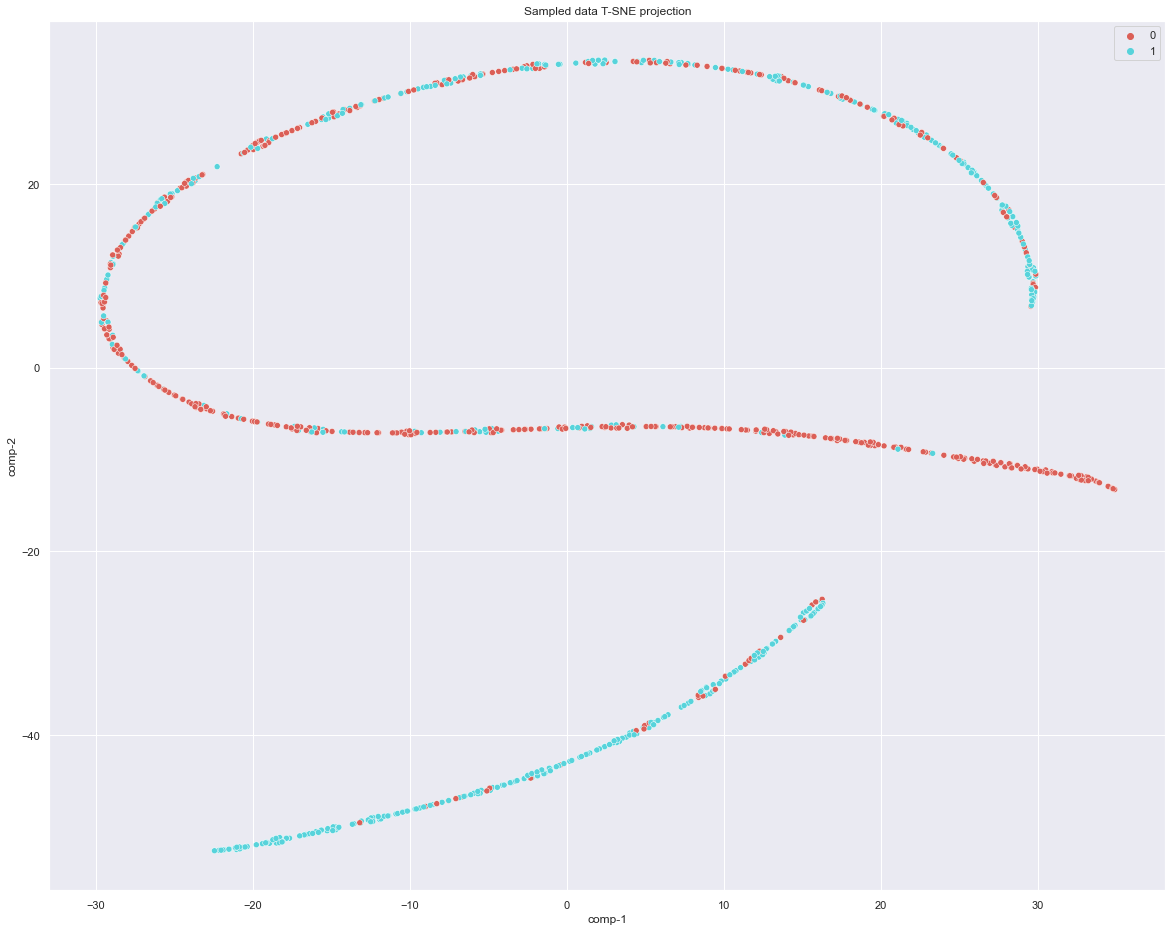

In [7]:
# TSNE

x = data.iloc[:, :p_sim['n_features']]
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(x)
d = pd.DataFrame()
d["tt"] = data[['tt']].values.squeeze()
d["comp-1"] = z[:, 0]
d["comp-2"] = z[:, 1]

fig = plt.figure()
sns.scatterplot(x="comp-1", y="comp-2", hue=d.tt.tolist(),
            palette=sns.color_palette("hls", 2),
            data=d).set(title="Sampled data T-SNE projection")
fig.show()

# send figure to neptune
nep.send_plot(fig, "TSNE initial",num_run=0)


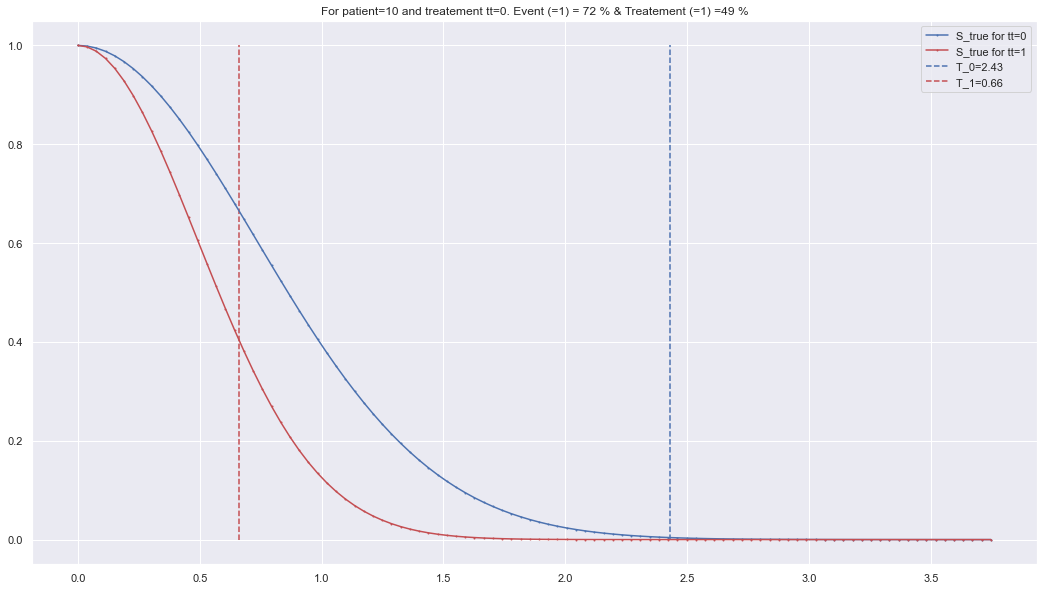

In [8]:
simu.plot_surv_true(patient=10)

# Tunning

In [9]:
#Tunning Survcaus 


tunning = Tunning(p_sim)
n_trials = 10
   
    
p_survcaus_best = tunning.get_best_hyperparameter_survcaus(n_trials=10)


[I 2021-11-21 20:38:25,824] A new study created in memory with name: no-name-fe48ef12-8da8-41c1-a51d-b63960e87a6a


0:	[0s / 0s],		train_loss: 2.5142,	train_loss_surv: 2.5142,	train_loss_wass: 0.0002,	val_loss: 2.5886,	val_loss_surv: 2.5886,	val_loss_wass: 0.0002
1:	[0s / 0s],		train_loss: 2.4489,	train_loss_surv: 2.4489,	train_loss_wass: 0.0003,	val_loss: 2.5818,	val_loss_surv: 2.5818,	val_loss_wass: 0.0003
2:	[0s / 0s],		train_loss: 2.4174,	train_loss_surv: 2.4173,	train_loss_wass: 0.0004,	val_loss: 2.5720,	val_loss_surv: 2.5720,	val_loss_wass: 0.0003
3:	[0s / 1s],		train_loss: 2.3530,	train_loss_surv: 2.3530,	train_loss_wass: 0.0004,	val_loss: 2.5579,	val_loss_surv: 2.5579,	val_loss_wass: 0.0004
4:	[1s / 2s],		train_loss: 2.3411,	train_loss_surv: 2.3411,	train_loss_wass: 0.0004,	val_loss: 2.5325,	val_loss_surv: 2.5324,	val_loss_wass: 0.0005
5:	[1s / 3s],		train_loss: 2.2968,	train_loss_surv: 2.2967,	train_loss_wass: 0.0005,	val_loss: 2.5094,	val_loss_surv: 2.5093,	val_loss_wass: 0.0005
6:	[1s / 5s],		train_loss: 2.2097,	train_loss_surv: 2.2097,	train_loss_wass: 0.0006,	val_loss: 2.5015,	val_loss_

  0%|          | 1/200 [00:00<00:25,  7.72it/s]

13:	[1s / 14s],		train_loss: 2.2276,	train_loss_surv: 2.2275,	train_loss_wass: 0.0007,	val_loss: 2.4528,	val_loss_surv: 2.4528,	val_loss_wass: 0.0006


100%|██████████| 200/200 [00:00<00:00, 685.01it/s]
[I 2021-11-21 20:38:41,073] Trial 0 finished with value: 0.06046462667498923 and parameters: {'num_durations': 26, 'encoded_features': 13, 'alpha_wass': 0.07428082507955676, 'lr': 0.004191941045959429}. Best is trial 0 with value: 0.06046462667498923.


0:	[0s / 0s],		train_loss: 2.5998,	train_loss_surv: 2.5998,	train_loss_wass: 0.0001,	val_loss: 2.6427,	val_loss_surv: 2.6427,	val_loss_wass: 0.0001
1:	[0s / 0s],		train_loss: 2.5875,	train_loss_surv: 2.5875,	train_loss_wass: 0.0002,	val_loss: 2.6433,	val_loss_surv: 2.6433,	val_loss_wass: 0.0001
2:	[0s / 0s],		train_loss: 2.5711,	train_loss_surv: 2.5711,	train_loss_wass: 0.0002,	val_loss: 2.6441,	val_loss_surv: 2.6441,	val_loss_wass: 0.0001
3:	[0s / 0s],		train_loss: 2.5405,	train_loss_surv: 2.5405,	train_loss_wass: 0.0001,	val_loss: 2.6448,	val_loss_surv: 2.6448,	val_loss_wass: 0.0001


 46%|████▋     | 93/200 [00:00<00:00, 925.44it/s]

4:	[0s / 0s],		train_loss: 2.5685,	train_loss_surv: 2.5685,	train_loss_wass: 0.0001,	val_loss: 2.6451,	val_loss_surv: 2.6451,	val_loss_wass: 0.0001


100%|██████████| 200/200 [00:00<00:00, 943.89it/s]
[I 2021-11-21 20:38:41,706] Trial 1 finished with value: 0.09664942304281177 and parameters: {'num_durations': 29, 'encoded_features': 11, 'alpha_wass': 0.033714304997964746, 'lr': 0.00036492938155230223}. Best is trial 0 with value: 0.06046462667498923.


0:	[0s / 0s],		train_loss: 2.3523,	train_loss_surv: 2.3522,	train_loss_wass: 0.0001,	val_loss: 2.4750,	val_loss_surv: 2.4750,	val_loss_wass: 0.0001
1:	[0s / 0s],		train_loss: 2.3002,	train_loss_surv: 2.3001,	train_loss_wass: 0.0001,	val_loss: 2.4686,	val_loss_surv: 2.4686,	val_loss_wass: 0.0001
2:	[0s / 0s],		train_loss: 2.2262,	train_loss_surv: 2.2262,	train_loss_wass: 0.0001,	val_loss: 2.4597,	val_loss_surv: 2.4597,	val_loss_wass: 0.0001
3:	[0s / 1s],		train_loss: 2.2043,	train_loss_surv: 2.2043,	train_loss_wass: 0.0001,	val_loss: 2.4527,	val_loss_surv: 2.4527,	val_loss_wass: 0.0001
4:	[0s / 2s],		train_loss: 2.1583,	train_loss_surv: 2.1583,	train_loss_wass: 0.0003,	val_loss: 2.4434,	val_loss_surv: 2.4434,	val_loss_wass: 0.0002
5:	[1s / 3s],		train_loss: 2.0986,	train_loss_surv: 2.0986,	train_loss_wass: 0.0004,	val_loss: 2.4268,	val_loss_surv: 2.4268,	val_loss_wass: 0.0002
6:	[1s / 4s],		train_loss: 2.1579,	train_loss_surv: 2.1579,	train_loss_wass: 0.0002,	val_loss: 2.4085,	val_loss_

 44%|████▎     | 87/200 [00:00<00:00, 865.58it/s]

16:	[1s / 16s],		train_loss: 2.0777,	train_loss_surv: 2.0777,	train_loss_wass: 0.0003,	val_loss: 2.3657,	val_loss_surv: 2.3657,	val_loss_wass: 0.0002


100%|██████████| 200/200 [00:00<00:00, 873.27it/s]
[I 2021-11-21 20:38:58,981] Trial 2 finished with value: 0.05455652109754223 and parameters: {'num_durations': 21, 'encoded_features': 13, 'alpha_wass': 0.021167184497374307, 'lr': 0.0028288635629394178}. Best is trial 2 with value: 0.05455652109754223.


0:	[0s / 0s],		train_loss: 2.4033,	train_loss_surv: 2.4033,	train_loss_wass: 0.0002,	val_loss: 2.5599,	val_loss_surv: 2.5599,	val_loss_wass: 0.0001
1:	[0s / 0s],		train_loss: 2.3935,	train_loss_surv: 2.3935,	train_loss_wass: 0.0001,	val_loss: 2.5547,	val_loss_surv: 2.5547,	val_loss_wass: 0.0001
2:	[0s / 0s],		train_loss: 2.3962,	train_loss_surv: 2.3962,	train_loss_wass: 0.0001,	val_loss: 2.5469,	val_loss_surv: 2.5469,	val_loss_wass: 0.0002
3:	[0s / 1s],		train_loss: 2.3616,	train_loss_surv: 2.3616,	train_loss_wass: 0.0001,	val_loss: 2.5365,	val_loss_surv: 2.5365,	val_loss_wass: 0.0002
4:	[1s / 2s],		train_loss: 2.3288,	train_loss_surv: 2.3288,	train_loss_wass: 0.0002,	val_loss: 2.5228,	val_loss_surv: 2.5228,	val_loss_wass: 0.0003
5:	[1s / 3s],		train_loss: 2.2712,	train_loss_surv: 2.2712,	train_loss_wass: 0.0002,	val_loss: 2.5078,	val_loss_surv: 2.5078,	val_loss_wass: 0.0002
6:	[1s / 4s],		train_loss: 2.2646,	train_loss_surv: 2.2646,	train_loss_wass: 0.0002,	val_loss: 2.4923,	val_loss_

 52%|█████▏    | 104/200 [00:00<00:00, 1030.65it/s]

19:	[1s / 19s],		train_loss: 2.1401,	train_loss_surv: 2.1401,	train_loss_wass: 0.0003,	val_loss: 2.4351,	val_loss_surv: 2.4351,	val_loss_wass: 0.0003


100%|██████████| 200/200 [00:00<00:00, 918.11it/s] 
[I 2021-11-21 20:39:19,144] Trial 3 finished with value: 0.0518975864452777 and parameters: {'num_durations': 25, 'encoded_features': 14, 'alpha_wass': 0.017702125363861912, 'lr': 0.002239519901757753}. Best is trial 3 with value: 0.0518975864452777.


0:	[0s / 0s],		train_loss: 2.6374,	train_loss_surv: 2.6374,	train_loss_wass: 0.0001,	val_loss: 2.6267,	val_loss_surv: 2.6267,	val_loss_wass: 0.0001
1:	[0s / 0s],		train_loss: 2.6045,	train_loss_surv: 2.6045,	train_loss_wass: 0.0002,	val_loss: 2.6273,	val_loss_surv: 2.6273,	val_loss_wass: 0.0001
2:	[0s / 0s],		train_loss: 2.5839,	train_loss_surv: 2.5839,	train_loss_wass: 0.0002,	val_loss: 2.6283,	val_loss_surv: 2.6283,	val_loss_wass: 0.0001
3:	[0s / 0s],		train_loss: 2.5742,	train_loss_surv: 2.5742,	train_loss_wass: 0.0001,	val_loss: 2.6291,	val_loss_surv: 2.6291,	val_loss_wass: 0.0001


 36%|███▋      | 73/200 [00:00<00:00, 721.71it/s]

4:	[0s / 0s],		train_loss: 2.5767,	train_loss_surv: 2.5766,	train_loss_wass: 0.0003,	val_loss: 2.6297,	val_loss_surv: 2.6297,	val_loss_wass: 0.0001


100%|██████████| 200/200 [00:00<00:00, 788.42it/s]
[I 2021-11-21 20:39:20,132] Trial 4 finished with value: 0.09597836468309008 and parameters: {'num_durations': 29, 'encoded_features': 20, 'alpha_wass': 0.011397961843219504, 'lr': 0.0001499534051411952}. Best is trial 3 with value: 0.0518975864452777.


0:	[0s / 0s],		train_loss: 2.3231,	train_loss_surv: 2.3231,	train_loss_wass: 0.0002,	val_loss: 2.3161,	val_loss_surv: 2.3161,	val_loss_wass: 0.0003
1:	[0s / 0s],		train_loss: 2.2574,	train_loss_surv: 2.2574,	train_loss_wass: 0.0003,	val_loss: 2.3063,	val_loss_surv: 2.3063,	val_loss_wass: 0.0004
2:	[1s / 1s],		train_loss: 2.1762,	train_loss_surv: 2.1762,	train_loss_wass: 0.0002,	val_loss: 2.2934,	val_loss_surv: 2.2934,	val_loss_wass: 0.0004
3:	[2s / 4s],		train_loss: 2.0979,	train_loss_surv: 2.0979,	train_loss_wass: 0.0004,	val_loss: 2.2720,	val_loss_surv: 2.2720,	val_loss_wass: 0.0004
4:	[1s / 5s],		train_loss: 2.1146,	train_loss_surv: 2.1145,	train_loss_wass: 0.0007,	val_loss: 2.2549,	val_loss_surv: 2.2549,	val_loss_wass: 0.0004
5:	[1s / 6s],		train_loss: 2.1118,	train_loss_surv: 2.1118,	train_loss_wass: 0.0004,	val_loss: 2.2332,	val_loss_surv: 2.2332,	val_loss_wass: 0.0004
6:	[1s / 7s],		train_loss: 2.0617,	train_loss_surv: 2.0617,	train_loss_wass: 0.0005,	val_loss: 2.2096,	val_loss_

 40%|████      | 81/200 [00:00<00:00, 807.13it/s]

14:	[1s / 19s],		train_loss: 2.0738,	train_loss_surv: 2.0738,	train_loss_wass: 0.0004,	val_loss: 2.1768,	val_loss_surv: 2.1768,	val_loss_wass: 0.0004


100%|██████████| 200/200 [00:00<00:00, 770.88it/s]
[I 2021-11-21 20:39:40,425] Trial 5 finished with value: 0.05094238101149176 and parameters: {'num_durations': 20, 'encoded_features': 18, 'alpha_wass': 0.014153205658242908, 'lr': 0.00437093169866506}. Best is trial 5 with value: 0.05094238101149176.


0:	[0s / 0s],		train_loss: 2.6395,	train_loss_surv: 2.6395,	train_loss_wass: 0.0003,	val_loss: 2.7793,	val_loss_surv: 2.7793,	val_loss_wass: 0.0001
1:	[0s / 0s],		train_loss: 2.5338,	train_loss_surv: 2.5338,	train_loss_wass: 0.0002,	val_loss: 2.7749,	val_loss_surv: 2.7749,	val_loss_wass: 0.0001
2:	[1s / 1s],		train_loss: 2.4653,	train_loss_surv: 2.4653,	train_loss_wass: 0.0003,	val_loss: 2.7689,	val_loss_surv: 2.7688,	val_loss_wass: 0.0003
3:	[2s / 4s],		train_loss: 2.4468,	train_loss_surv: 2.4467,	train_loss_wass: 0.0006,	val_loss: 2.7563,	val_loss_surv: 2.7563,	val_loss_wass: 0.0003
4:	[1s / 6s],		train_loss: 2.3753,	train_loss_surv: 2.3752,	train_loss_wass: 0.0006,	val_loss: 2.7452,	val_loss_surv: 2.7451,	val_loss_wass: 0.0003
5:	[1s / 8s],		train_loss: 2.3470,	train_loss_surv: 2.3469,	train_loss_wass: 0.0007,	val_loss: 2.7326,	val_loss_surv: 2.7326,	val_loss_wass: 0.0003
6:	[1s / 9s],		train_loss: 2.3797,	train_loss_surv: 2.3796,	train_loss_wass: 0.0006,	val_loss: 2.7205,	val_loss_

 55%|█████▌    | 110/200 [00:00<00:00, 1098.00it/s]

13:	[1s / 19s],		train_loss: 2.2503,	train_loss_surv: 2.2502,	train_loss_wass: 0.0009,	val_loss: 2.7324,	val_loss_surv: 2.7324,	val_loss_wass: 0.0004


100%|██████████| 200/200 [00:00<00:00, 978.54it/s] 
[I 2021-11-21 20:40:00,120] Trial 6 finished with value: 0.04992411012656234 and parameters: {'num_durations': 30, 'encoded_features': 29, 'alpha_wass': 0.09742646856168102, 'lr': 0.00482825444236242}. Best is trial 6 with value: 0.04992411012656234.


0:	[0s / 0s],		train_loss: 2.3459,	train_loss_surv: 2.3459,	train_loss_wass: 0.0002,	val_loss: 2.4561,	val_loss_surv: 2.4561,	val_loss_wass: 0.0003
1:	[0s / 0s],		train_loss: 2.2823,	train_loss_surv: 2.2823,	train_loss_wass: 0.0001,	val_loss: 2.4548,	val_loss_surv: 2.4548,	val_loss_wass: 0.0002
2:	[0s / 0s],		train_loss: 2.2931,	train_loss_surv: 2.2931,	train_loss_wass: 0.0002,	val_loss: 2.4520,	val_loss_surv: 2.4520,	val_loss_wass: 0.0002
3:	[0s / 0s],		train_loss: 2.2544,	train_loss_surv: 2.2544,	train_loss_wass: 0.0002,	val_loss: 2.4485,	val_loss_surv: 2.4485,	val_loss_wass: 0.0003
4:	[0s / 0s],		train_loss: 2.2635,	train_loss_surv: 2.2635,	train_loss_wass: 0.0002,	val_loss: 2.4440,	val_loss_surv: 2.4440,	val_loss_wass: 0.0002
5:	[0s / 0s],		train_loss: 2.2497,	train_loss_surv: 2.2497,	train_loss_wass: 0.0002,	val_loss: 2.4387,	val_loss_surv: 2.4386,	val_loss_wass: 0.0002
6:	[0s / 0s],		train_loss: 2.2486,	train_loss_surv: 2.2486,	train_loss_wass: 0.0001,	val_loss: 2.4324,	val_loss_

 39%|███▉      | 78/200 [00:00<00:00, 779.92it/s]

19:	[0s / 5s],		train_loss: 2.1305,	train_loss_surv: 2.1304,	train_loss_wass: 0.0002,	val_loss: 2.3528,	val_loss_surv: 2.3528,	val_loss_wass: 0.0003


100%|██████████| 200/200 [00:00<00:00, 770.74it/s]
[I 2021-11-21 20:40:06,086] Trial 7 finished with value: 0.0525932639579216 and parameters: {'num_durations': 21, 'encoded_features': 15, 'alpha_wass': 0.08469604142412053, 'lr': 0.0008166834561531742}. Best is trial 6 with value: 0.04992411012656234.


0:	[0s / 0s],		train_loss: 2.3630,	train_loss_surv: 2.3630,	train_loss_wass: 0.0001,	val_loss: 2.5391,	val_loss_surv: 2.5391,	val_loss_wass: 0.0001
1:	[0s / 0s],		train_loss: 2.2568,	train_loss_surv: 2.2568,	train_loss_wass: 0.0002,	val_loss: 2.5260,	val_loss_surv: 2.5260,	val_loss_wass: 0.0002
2:	[0s / 1s],		train_loss: 2.1386,	train_loss_surv: 2.1386,	train_loss_wass: 0.0003,	val_loss: 2.5060,	val_loss_surv: 2.5060,	val_loss_wass: 0.0002
3:	[0s / 2s],		train_loss: 2.1516,	train_loss_surv: 2.1516,	train_loss_wass: 0.0005,	val_loss: 2.4832,	val_loss_surv: 2.4832,	val_loss_wass: 0.0002
4:	[1s / 3s],		train_loss: 2.1207,	train_loss_surv: 2.1207,	train_loss_wass: 0.0003,	val_loss: 2.4605,	val_loss_surv: 2.4605,	val_loss_wass: 0.0003
5:	[1s / 4s],		train_loss: 2.0746,	train_loss_surv: 2.0746,	train_loss_wass: 0.0002,	val_loss: 2.4435,	val_loss_surv: 2.4435,	val_loss_wass: 0.0003
6:	[1s / 5s],		train_loss: 2.1347,	train_loss_surv: 2.1347,	train_loss_wass: 0.0004,	val_loss: 2.4349,	val_loss_

100%|██████████| 200/200 [00:00<00:00, 1095.53it/s]
[I 2021-11-21 20:40:22,545] Trial 8 finished with value: 0.0487305230121462 and parameters: {'num_durations': 20, 'encoded_features': 20, 'alpha_wass': 0.014785375823482416, 'lr': 0.005239311667707976}. Best is trial 8 with value: 0.0487305230121462.


14:	[1s / 16s],		train_loss: 2.0121,	train_loss_surv: 2.0121,	train_loss_wass: 0.0005,	val_loss: 2.4404,	val_loss_surv: 2.4404,	val_loss_wass: 0.0005
0:	[0s / 0s],		train_loss: 2.5729,	train_loss_surv: 2.5729,	train_loss_wass: 0.0005,	val_loss: 2.5796,	val_loss_surv: 2.5796,	val_loss_wass: 0.0003
1:	[0s / 0s],		train_loss: 2.5562,	train_loss_surv: 2.5562,	train_loss_wass: 0.0003,	val_loss: 2.5799,	val_loss_surv: 2.5799,	val_loss_wass: 0.0003
2:	[0s / 0s],		train_loss: 2.5406,	train_loss_surv: 2.5406,	train_loss_wass: 0.0002,	val_loss: 2.5804,	val_loss_surv: 2.5804,	val_loss_wass: 0.0003
3:	[0s / 0s],		train_loss: 2.5665,	train_loss_surv: 2.5665,	train_loss_wass: 0.0003,	val_loss: 2.5812,	val_loss_surv: 2.5812,	val_loss_wass: 0.0003


 30%|██▉       | 59/200 [00:00<00:00, 587.42it/s]

4:	[0s / 0s],		train_loss: 2.5280,	train_loss_surv: 2.5280,	train_loss_wass: 0.0002,	val_loss: 2.5822,	val_loss_surv: 2.5822,	val_loss_wass: 0.0003


100%|██████████| 200/200 [00:00<00:00, 702.01it/s]
[I 2021-11-21 20:40:23,682] Trial 9 finished with value: 0.09766461854409324 and parameters: {'num_durations': 28, 'encoded_features': 29, 'alpha_wass': 0.04774213527880797, 'lr': 0.00015469255422846561}. Best is trial 8 with value: 0.0487305230121462.


In [10]:
# Tunning BART 

p_bart_best = tunning.get_best_hyperparameter_bart(n_trials=1)
            

[I 2021-11-21 20:40:23,711] A new study created in memory with name: no-name-ffd9d568-f822-4eb4-b81e-2c7d2320766b
100%|██████████| 200/200 [00:02<00:00, 75.99it/s] 
[I 2021-11-21 20:40:26,664] Trial 0 finished with value: 0.06995810240975173 and parameters: {'num_trees': 20, 'max_features': 'log2', 'max_depth': 9, 'alpha': 0.08374895959912249}. Best is trial 0 with value: 0.06995810240975173.


# Training 

In [11]:

p_survcaus = p_survcaus_best.copy()

p_survcaus['patience'] = 2
p_survcaus['epochs'] = 20
p_survcaus['batch_size'] = 256
p_survcaus['num_durations'] = 25 #20
p_survcaus['encoded_features'] =12
    
print("Best hyperparameter for survcaus : ", p_survcaus)
print("Best hyperparameter for BART : ", p_bart_best)
    
Ev = Evaluation(p_sim, p_survcaus)


list_models =  ["SurvCaus", "SurvCaus_0",'BART', 'CoxPH','DeepSurv','EST','RSF']
print("Choosed models : ", list_models)

nep.send_dict(p_survcaus, "p_survcaus",num_run=0)
nep.send_dict(p_bart_best, "p_bart_best",num_run=0)

Best hyperparameter for survcaus :  {'num_durations': 25, 'encoded_features': 12, 'alpha_wass': 0.014785375823482416, 'lr': 0.005239311667707976, 'patience': 2, 'epochs': 20, 'batch_size': 256}
Best hyperparameter for BART :  {'num_trees': 20, 'max_features': 'log2', 'max_depth': 9, 'alpha': 0.08374895959912249}
Choosed models :  ['SurvCaus', 'SurvCaus_0', 'BART', 'CoxPH', 'DeepSurv', 'EST', 'RSF']


SurvCaus
{'num_durations': 25, 'encoded_features': 12, 'alpha_wass': 0.014785375823482416, 'lr': 0.005239311667707976, 'patience': 2, 'epochs': 20, 'batch_size': 256}
0:	[0s / 0s],		train_loss: 2.4445,	train_loss_surv: 2.4445,	train_loss_wass: 0.0001,	val_loss: 2.5725,	val_loss_surv: 2.5725,	val_loss_wass: 0.0001
1:	[0s / 0s],		train_loss: 2.3650,	train_loss_surv: 2.3650,	train_loss_wass: 0.0001,	val_loss: 2.5655,	val_loss_surv: 2.5655,	val_loss_wass: 0.0001
2:	[0s / 1s],		train_loss: 2.3102,	train_loss_surv: 2.3102,	train_loss_wass: 0.0002,	val_loss: 2.5538,	val_loss_surv: 2.5538,	val_loss_wass: 0.0002
3:	[1s / 2s],		train_loss: 2.2979,	train_loss_surv: 2.2979,	train_loss_wass: 0.0003,	val_loss: 2.5379,	val_loss_surv: 2.5379,	val_loss_wass: 0.0002
4:	[0s / 3s],		train_loss: 2.2963,	train_loss_surv: 2.2963,	train_loss_wass: 0.0003,	val_loss: 2.5216,	val_loss_surv: 2.5216,	val_loss_wass: 0.0003
5:	[1s / 5s],		train_loss: 2.2776,	train_loss_surv: 2.2776,	train_loss_wass: 0.0003,	val_loss

 38%|███▊      | 75/200 [00:00<00:00, 742.66it/s]

8:	[1s / 9s],		train_loss: 2.2080,	train_loss_surv: 2.2080,	train_loss_wass: 0.0006,	val_loss: 2.5125,	val_loss_surv: 2.5125,	val_loss_wass: 0.0004


100%|██████████| 200/200 [00:00<00:00, 715.70it/s]


SurvCaus_0
{'num_durations': 25, 'encoded_features': 12, 'alpha_wass': 0.0, 'lr': 0.005239311667707976, 'patience': 2, 'epochs': 20, 'batch_size': 256}
0:	[0s / 0s],		train_loss: 2.5171,	train_loss_surv: 2.5171,	train_loss_wass: 0.0001,	val_loss: 2.6125,	val_loss_surv: 2.6125,	val_loss_wass: 0.0001
1:	[0s / 0s],		train_loss: 2.3760,	train_loss_surv: 2.3760,	train_loss_wass: 0.0001,	val_loss: 2.6082,	val_loss_surv: 2.6082,	val_loss_wass: 0.0001
2:	[0s / 0s],		train_loss: 2.3470,	train_loss_surv: 2.3470,	train_loss_wass: 0.0003,	val_loss: 2.6016,	val_loss_surv: 2.6016,	val_loss_wass: 0.0001
3:	[1s / 1s],		train_loss: 2.2845,	train_loss_surv: 2.2845,	train_loss_wass: 0.0004,	val_loss: 2.5841,	val_loss_surv: 2.5841,	val_loss_wass: 0.0001
4:	[1s / 3s],		train_loss: 2.2783,	train_loss_surv: 2.2783,	train_loss_wass: 0.0002,	val_loss: 2.5620,	val_loss_surv: 2.5620,	val_loss_wass: 0.0002
5:	[1s / 4s],		train_loss: 2.2826,	train_loss_surv: 2.2826,	train_loss_wass: 0.0003,	val_loss: 2.5465,	val_l

 37%|███▋      | 74/200 [00:00<00:00, 731.75it/s]

9:	[1s / 10s],		train_loss: 2.2166,	train_loss_surv: 2.2166,	train_loss_wass: 0.0006,	val_loss: 2.5259,	val_loss_surv: 2.5259,	val_loss_wass: 0.0001


100%|██████████| 200/200 [00:00<00:00, 635.56it/s]


BART


100%|██████████| 200/200 [00:00<00:00, 385.63it/s]


CoxPH
Performing Newton-Raphson optimization
 * Iteration #1 - Loss = 845.479 - ||grad||^2 = 176.86670
 * Iteration #2 - Loss = 844.727 - ||grad||^2 = 159.19906
 * Iteration #3 - Loss = 844.116 - ||grad||^2 = 143.29610
 * Iteration #4 - Loss = 843.619 - ||grad||^2 = 128.98132
 * Iteration #5 - Loss = 843.217 - ||grad||^2 = 116.09603
 * Iteration #6 - Loss = 842.890 - ||grad||^2 = 104.49742
 * Iteration #7 - Loss = 842.624 - ||grad||^2 = 94.05704
 * Iteration #8 - Loss = 842.408 - ||grad||^2 = 84.65924
 * Iteration #9 - Loss = 842.234 - ||grad||^2 = 76.19995
 * Iteration #10 - Loss = 842.092 - ||grad||^2 = 68.58551
 * Iteration #11 - Loss = 841.976 - ||grad||^2 = 61.73159
 * Iteration #12 - Loss = 841.883 - ||grad||^2 = 55.56227
 * Iteration #13 - Loss = 841.807 - ||grad||^2 = 50.00922
 * Iteration #14 - Loss = 841.745 - ||grad||^2 = 45.01093
 * Iteration #15 - Loss = 841.695 - ||grad||^2 = 40.51200
 * Iteration #16 - Loss = 841.655 - ||grad||^2 = 36.46258
 * Iteration #17 - Loss = 841.

  0%|          | 0/200 [00:00<?, ?it/s]2021-11-21 20:40:58.107 INFO    numba.core.transforms: finding looplift candidates


 * Iteration #104 - Loss = 1099.498 - ||grad||^2 = 0.00957
Converged after 104 iterations.


100%|██████████| 200/200 [00:01<00:00, 125.33it/s]


DeepSurv




100%|██████████| 200/200 [00:00<00:00, 632.10it/s]


EST


100%|██████████| 200/200 [00:00<00:00, 613.04it/s]


RSF


100%|██████████| 200/200 [00:00<00:00, 721.18it/s]


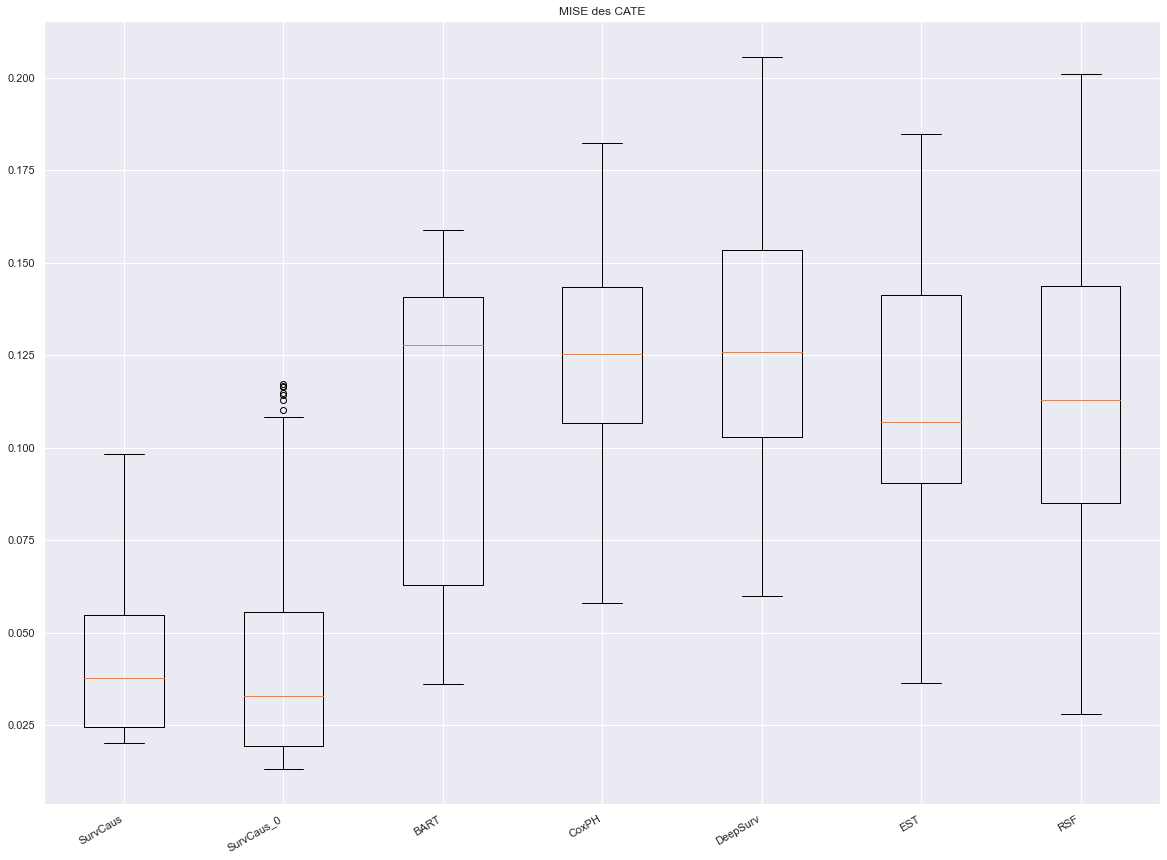

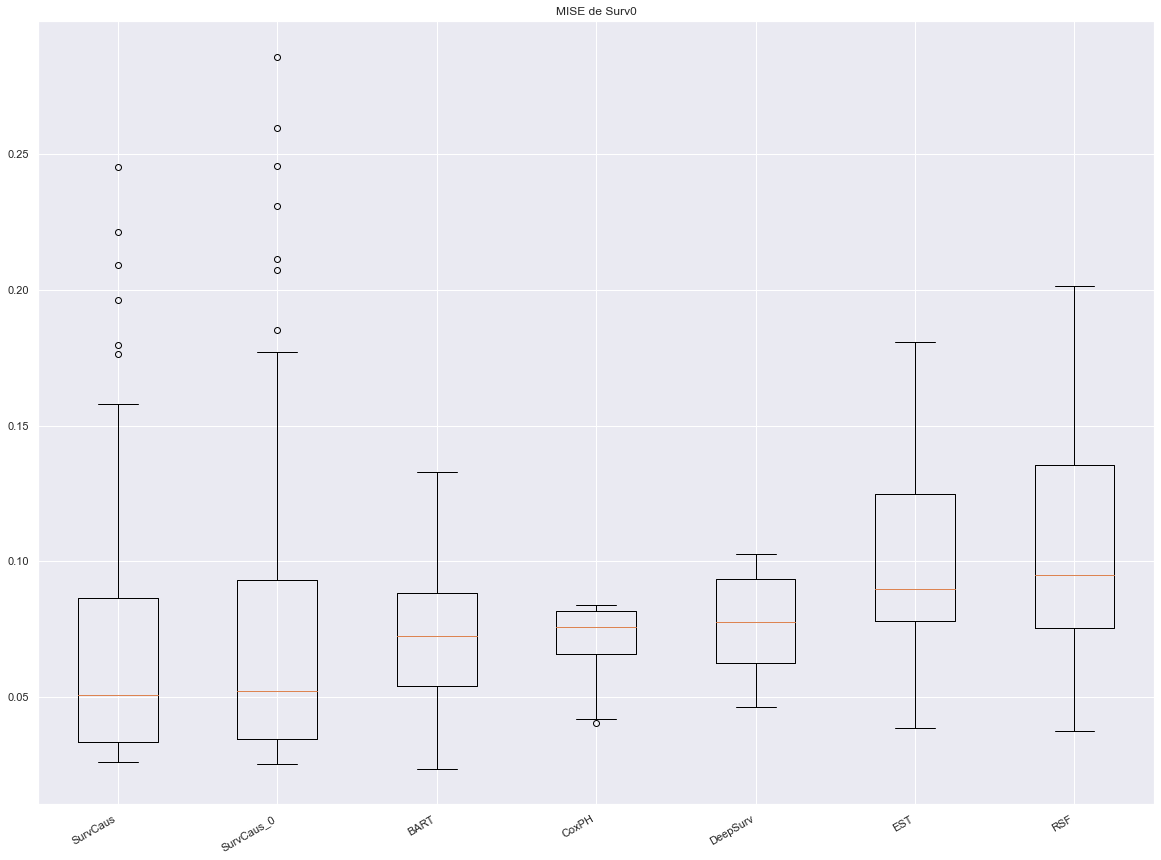

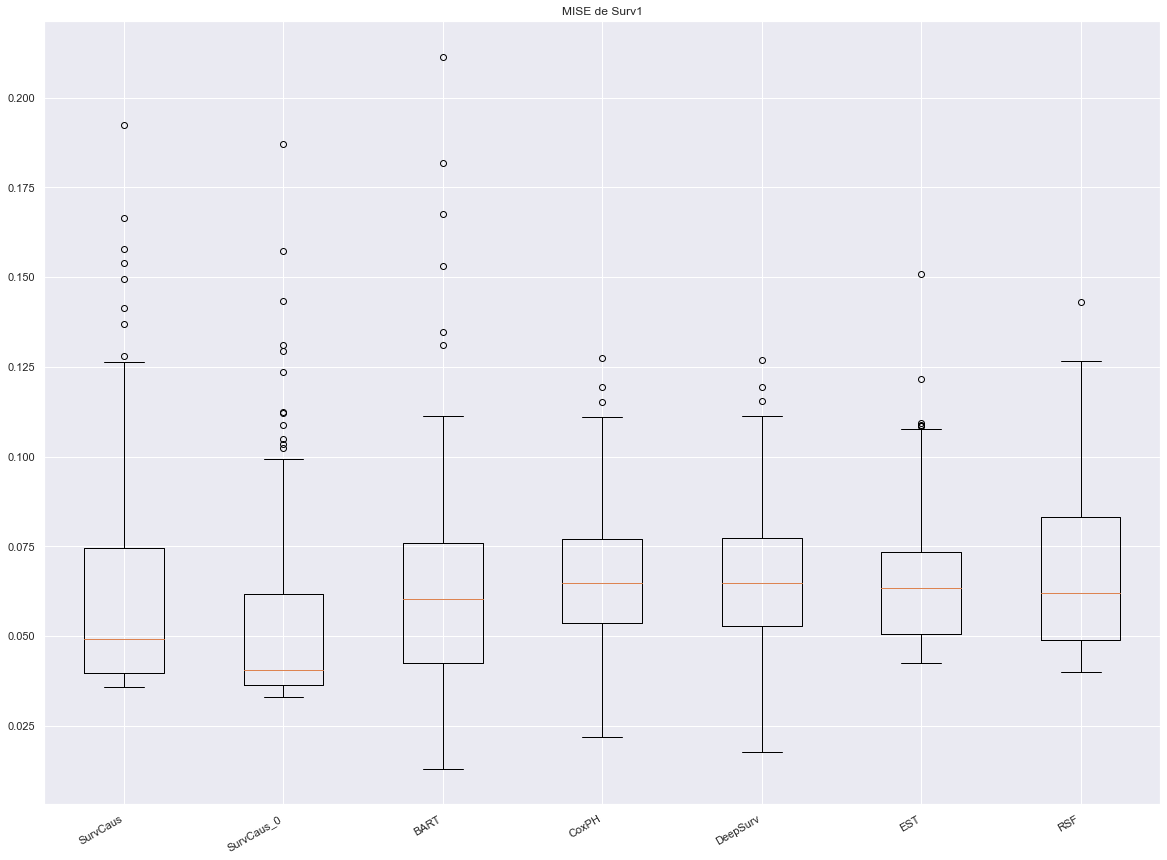

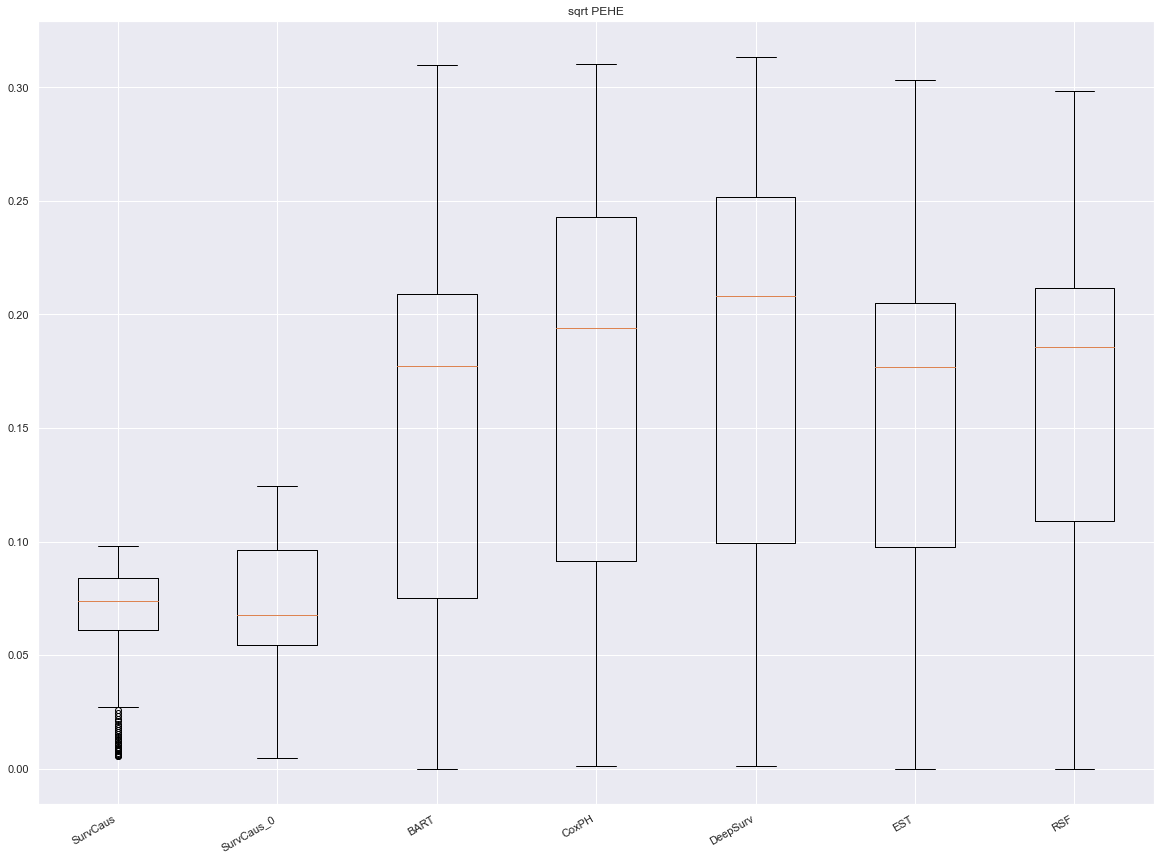

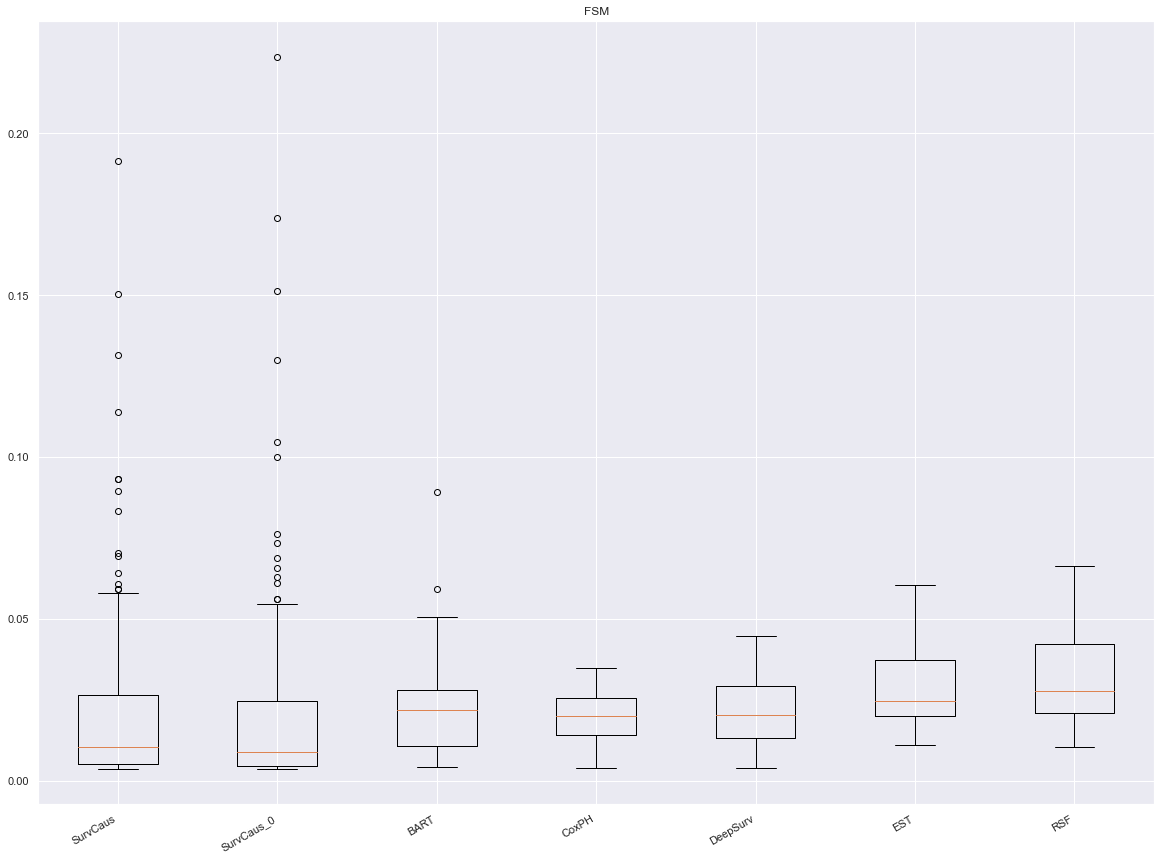

In [12]:
Ev.All_Results(list_models=list_models,
                        is_train=False,params_bart=p_bart_best)

# Benchmark

In [13]:
# Bilan of benchmark
Ev.bilan_benchmark
nep.send_data(Ev.bilan_benchmark, "bilan_benchmark",num_run=0)


In [14]:
def get_repr(Ev):
    repr = Ev.SC.net.get_repr(torch.tensor(Ev.data.x_train))
    # repr to numpy
    repr = repr.detach().numpy()
    t = Ev.data.x_train[:,-1]
    return repr,t

def tsne_f(repr,t):
    tsne = TSNE(n_components=2, verbose=1, random_state=123)
    z = tsne.fit_transform(repr)
    d = pd.DataFrame()
    d["tt"] = t
    d["comp-1"] = z[:, 0]
    d["comp-2"] = z[:, 1]

    fig = plt.figure()
    sns.scatterplot(x="comp-1", y="comp-2", hue=d.tt.tolist(),
                palette=sns.color_palette("hls", 2),
                data=d).set(title="Sampled data T-SNE projection")
    plt.close()
    return fig
    
    
repres,t = get_repr(Ev)
tsne_survcaus_final = tsne_f(repres,t)
tsne_survcaus_final
nep.send_plot(tsne_survcaus_final, "TSNE survcaus final",num_run=0)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 600 samples in 0.002s...
[t-SNE] Computed neighbors for 600 samples in 0.018s...
[t-SNE] Computed conditional probabilities for sample 600 / 600
[t-SNE] Mean sigma: 0.057531
[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.731937
[t-SNE] KL divergence after 1000 iterations: 0.135611


In [15]:
Ev.box_plot_cate
nep.send_plot(Ev.box_plot_cate, "box_plot_cate",num_run=0)


modifier S,
experiment
log - neptune
tables 
lancer :  wd, lin/nonlin, 
pas oublier brca !! 


In [16]:
Ev.box_plot_pehe
nep.send_plot(Ev.box_plot_pehe, "box_plot_pehe",num_run=0)

In [17]:
Ev.box_plot_surv0
nep.send_plot(Ev.box_plot_surv0, "box_plot_surv0",num_run=0)

In [18]:
Ev.box_plot_surv1
nep.send_plot(Ev.box_plot_surv1, "box_plot_surv1",num_run=0)

In [19]:
Ev.box_plot_FSM
nep.send_plot(Ev.box_plot_FSM, "box_plot_FSM",num_run=0)

(p_ours,p_bench) = (80, 80)
(p_ours,p_bench) = (80, 55)
(p_ours,p_bench) = (80, 174)
(p_ours,p_bench) = (80, 73)
(p_ours,p_bench) = (80, 73)
(p_ours,p_bench) = (80, 67)
(p_ours,p_bench) = (80, 122)


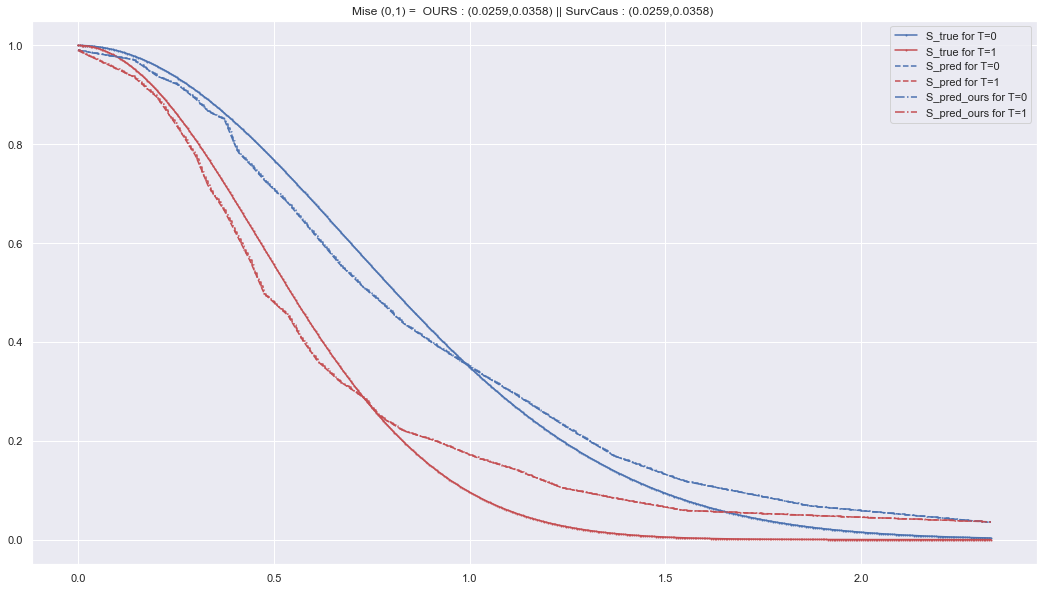

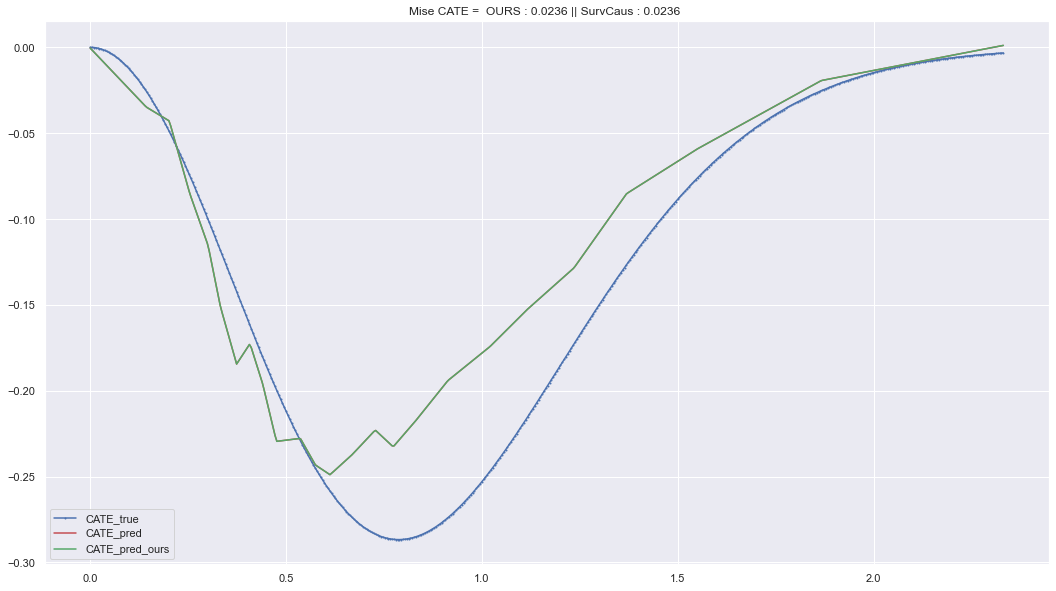

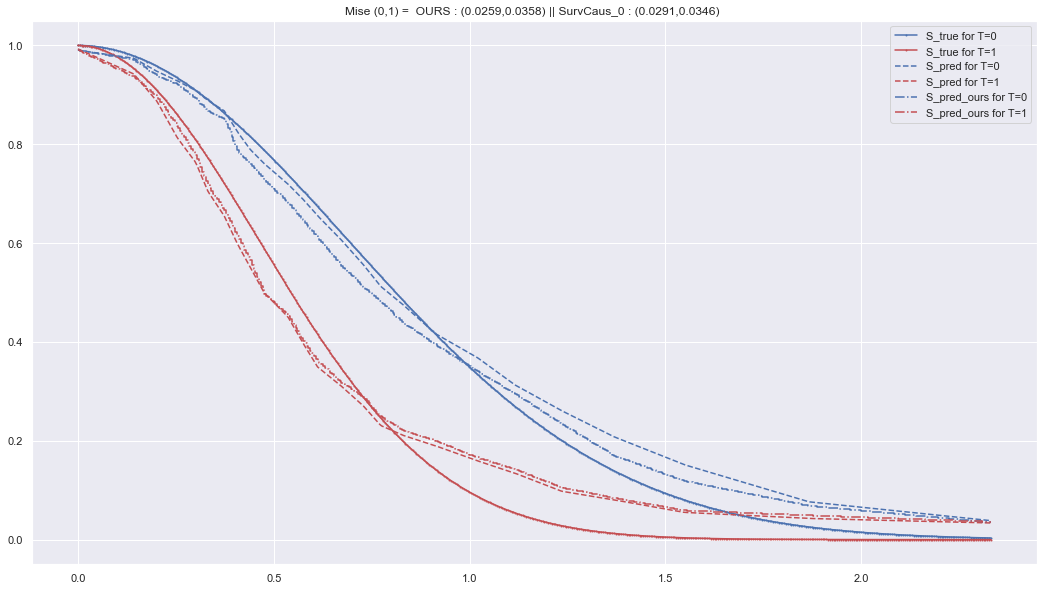

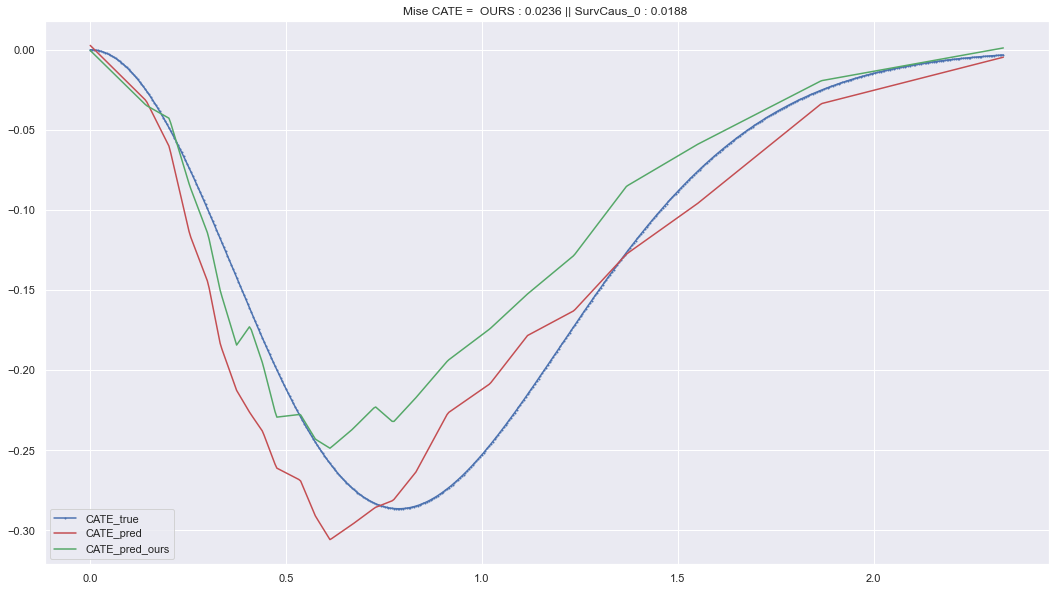

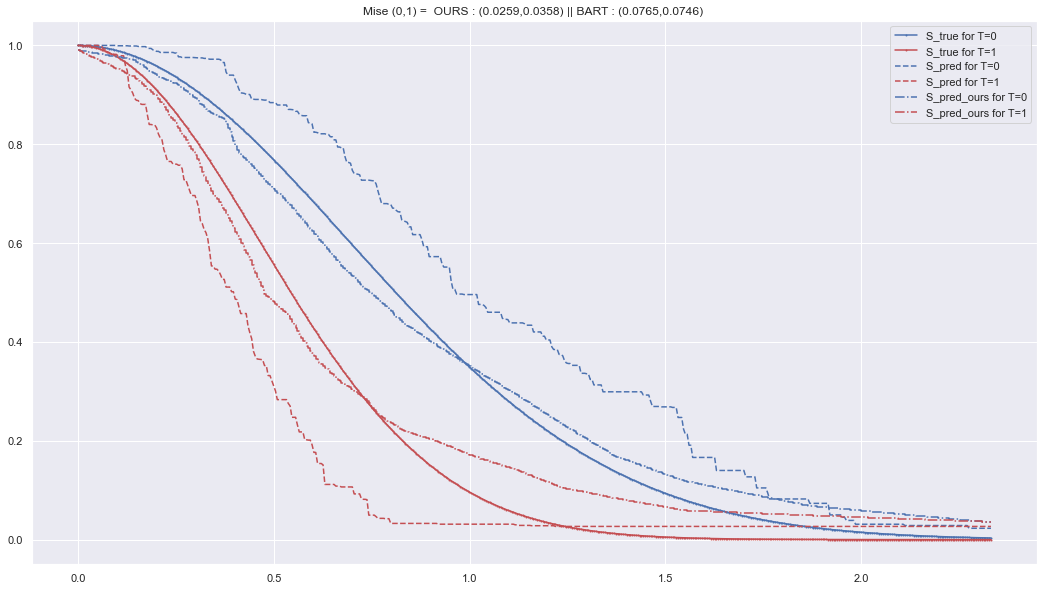

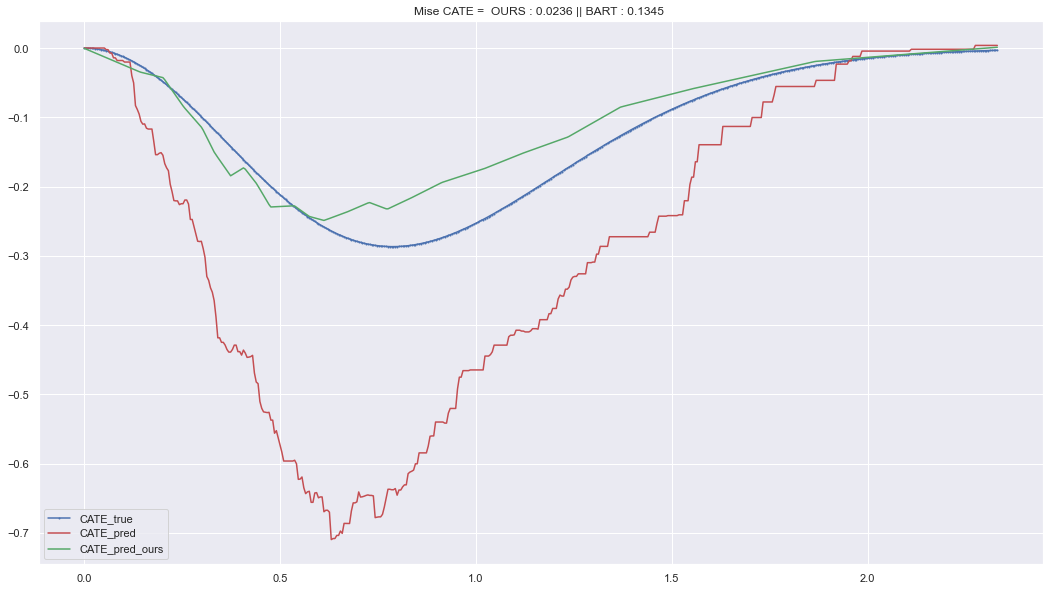

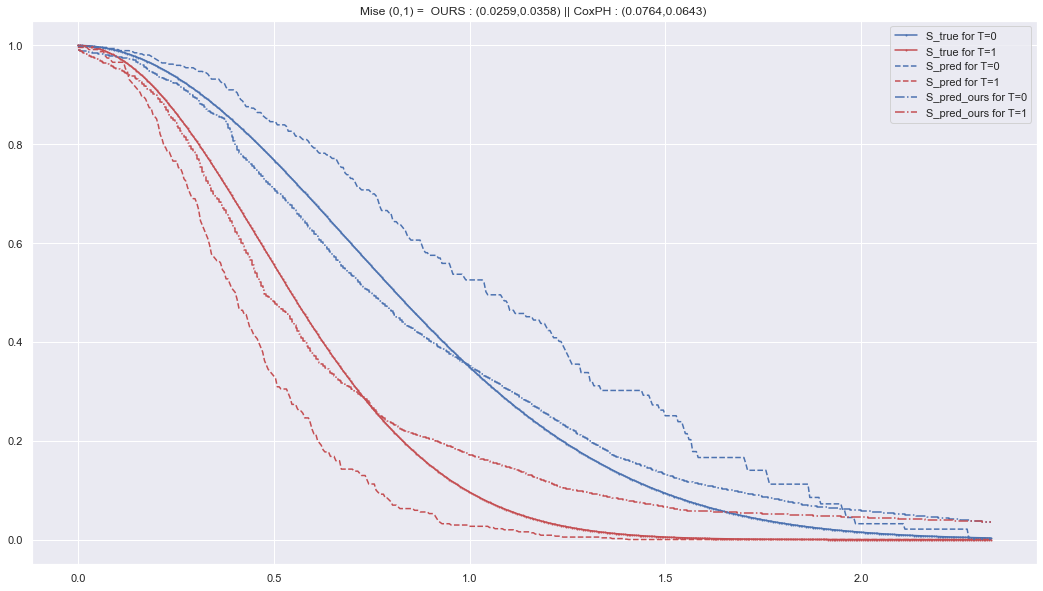

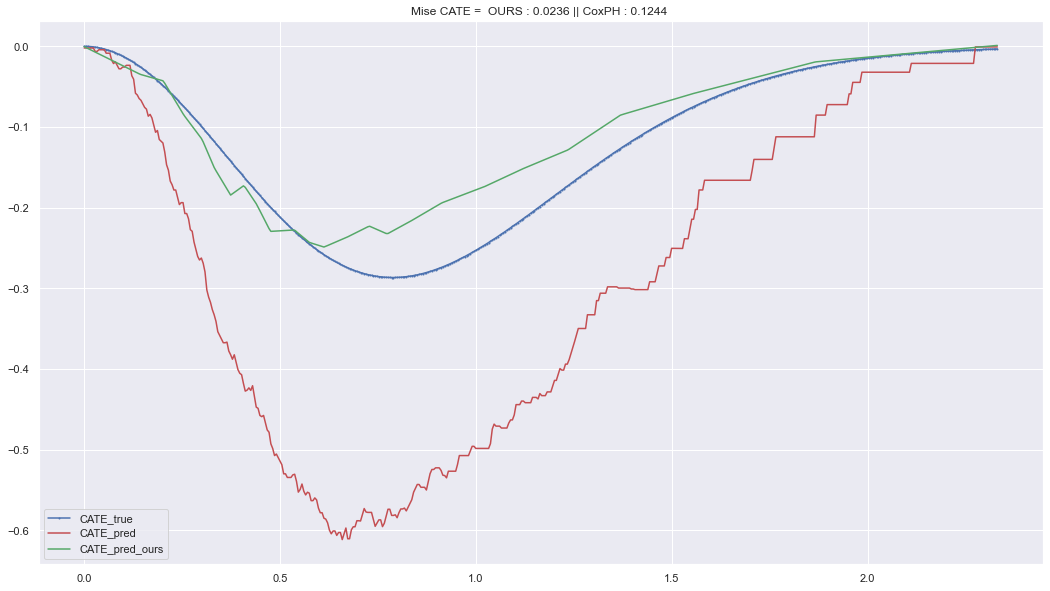

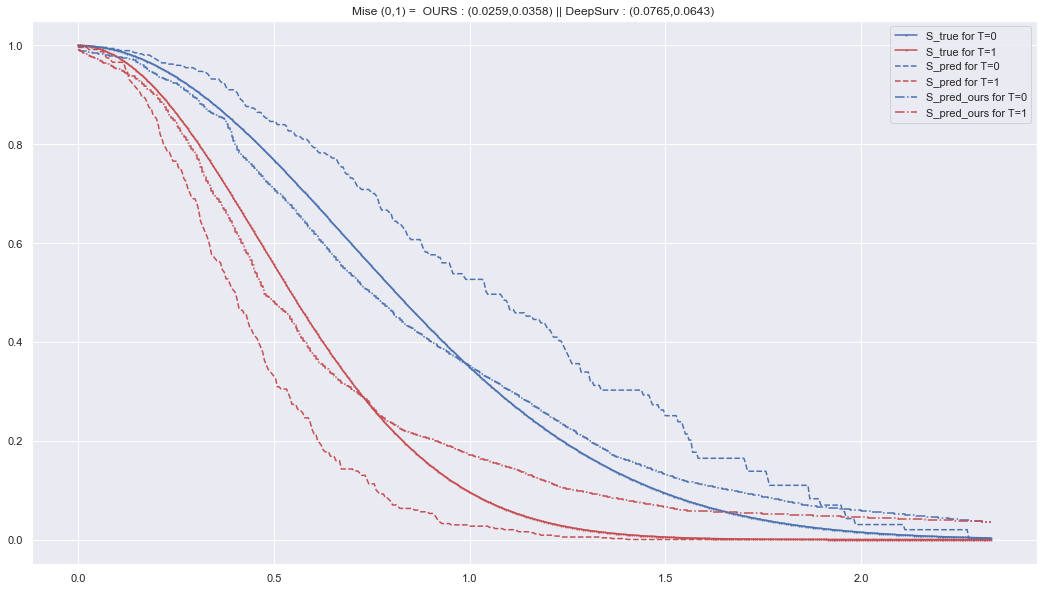

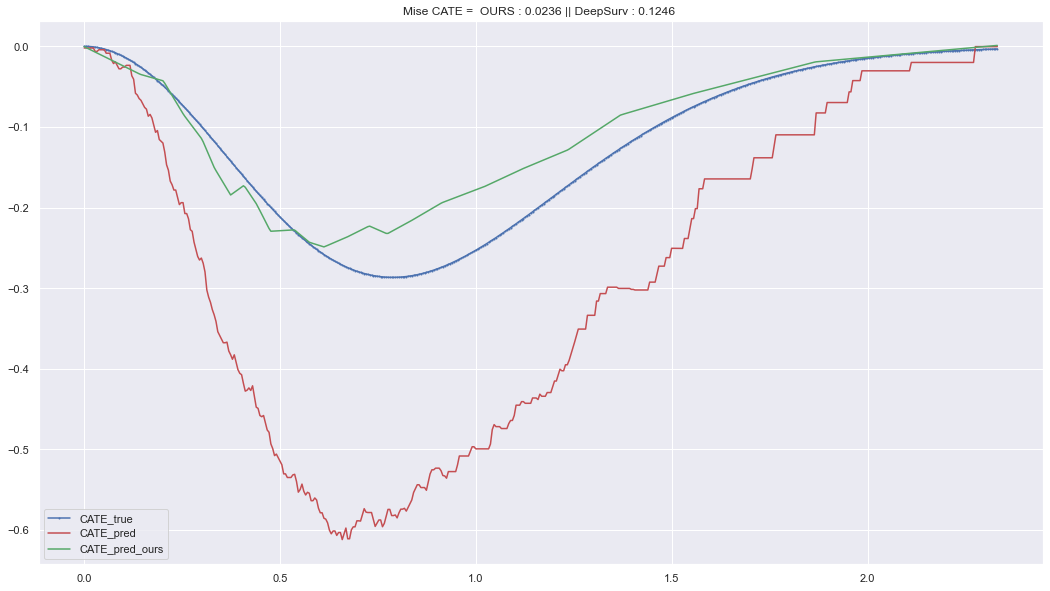

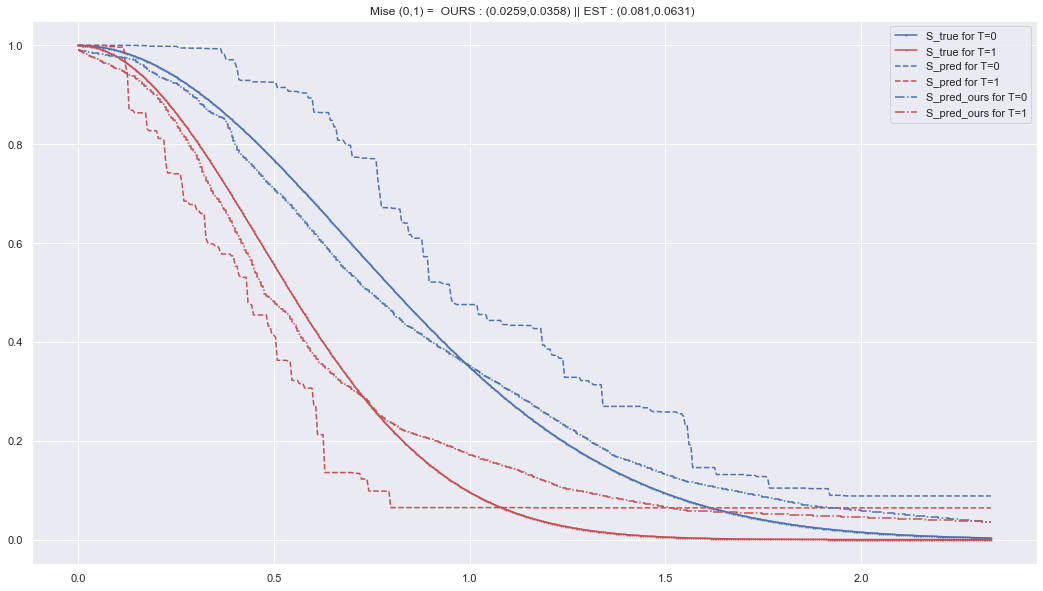

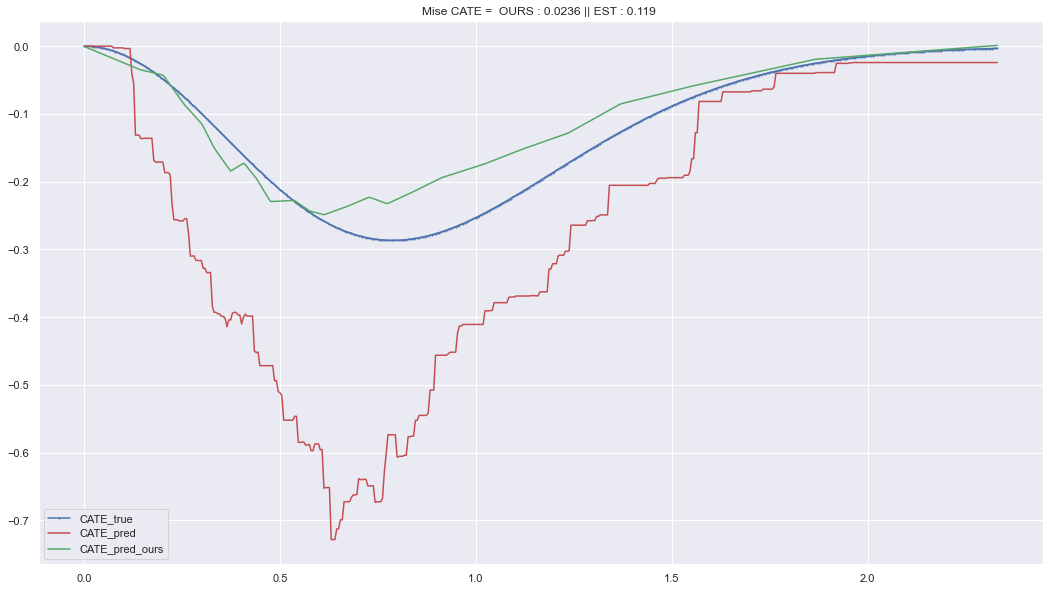

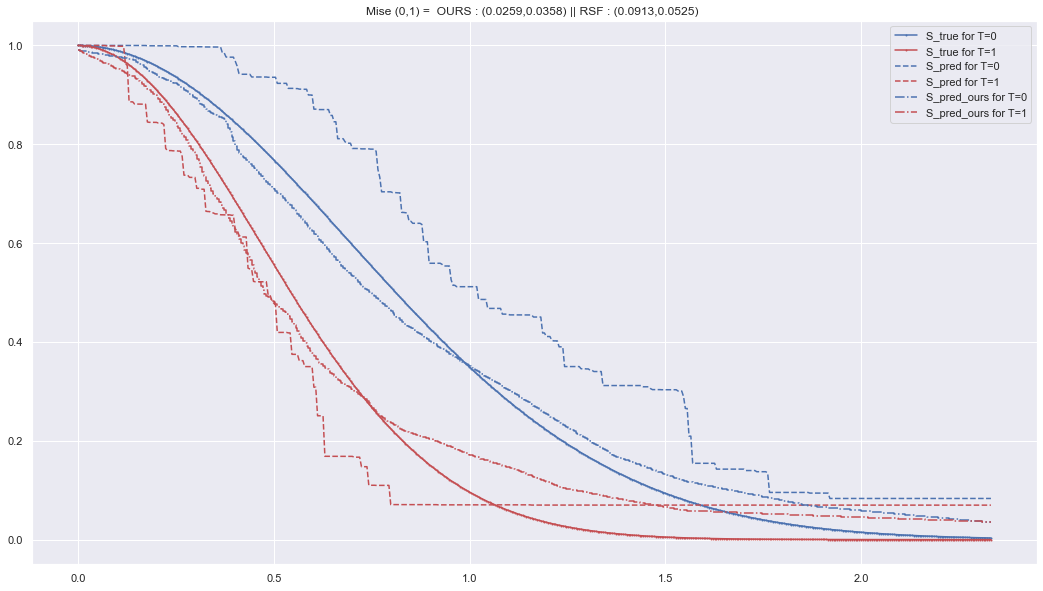

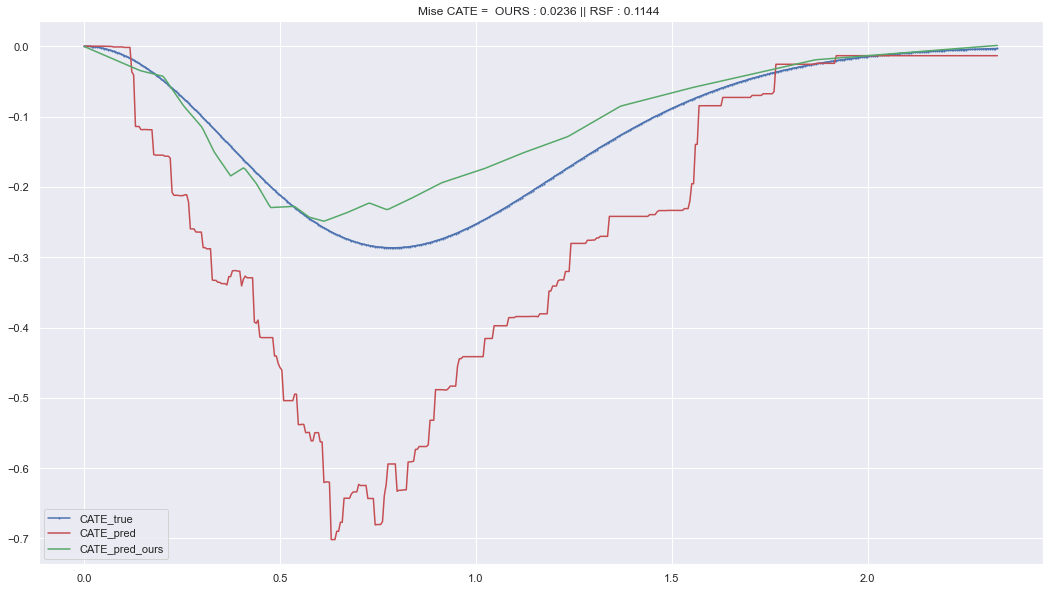

In [22]:

patient = 80
%matplotlib inline
d_q_all = {}
for model_name in Ev.list_models :
    fig_surv,fig_cate,d_q_model = plots(patient, Ev.d_list_models, model_name)
    d_q_all[model_name] = d_q_model
    nep.send_plot(fig_surv, "fig_surv_"+model_name,num_run=0)
    nep.send_plot(fig_cate, "fig_cate_"+model_name,num_run=0)


    



In [23]:

# dataframe of all the quantiles with the model name
df_q = pd.DataFrame(d_q_all)
nep.send_data(df_q, "df_q",num_run=0)
df_q


,SurvCaus,SurvCaus_0,BART,CoxPH,DeepSurv,EST,RSF
p,"[0.1, 0.25, 0.4, 0.5, 0.75, 0.9]","[0.1, 0.25, 0.4, 0.5, 0.75, 0.9]","[0.1, 0.25, 0.4, 0.5, 0.75, 0.9]","[0.1, 0.25, 0.4, 0.5, 0.75, 0.9]","[0.1, 0.25, 0.4, 0.5, 0.75, 0.9]","[0.1, 0.25, 0.4, 0.5, 0.75, 0.9]","[0.1, 0.25, 0.4, 0.5, 0.75, 0.9]"
t*_0 true,"[1.48, 1.15, 0.93, 0.81, 0.52, 0.32]","[1.48, 1.15, 0.93, 0.81, 0.52, 0.32]","[1.48, 1.15, 0.93, 0.81, 0.52, 0.32]","[1.48, 1.15, 0.93, 0.81, 0.52, 0.32]","[1.48, 1.15, 0.93, 0.81, 0.52, 0.32]","[1.48, 1.15, 0.93, 0.81, 0.52, 0.32]","[1.48, 1.15, 0.93, 0.81, 0.52, 0.32]"
t*_0 pred,"[1.66, 1.21, 0.9, 0.74, 0.45, 0.29]","[1.77, 1.26, 0.95, 0.79, 0.49, 0.31]","[1.73, 1.53, 1.2, 0.97, 0.7, 0.44]","[1.77, 1.5, 1.23, 1.04, 0.67, 0.41]","[1.77, 1.5, 1.23, 1.04, 0.67, 0.41]","[1.87, 1.55, 1.19, 0.95, 0.76, 0.57]","[1.77, 1.55, 1.21, 0.97, 0.77, 0.59]"
dif_0,0.089069,0.127802,0.242281,0.251694,0.251694,0.294222,0.283872
t*_1 true,"[0.99, 0.77, 0.63, 0.54, 0.35, 0.21]","[0.99, 0.77, 0.63, 0.54, 0.35, 0.21]","[0.99, 0.77, 0.63, 0.54, 0.35, 0.21]","[0.99, 0.77, 0.63, 0.54, 0.35, 0.21]","[0.99, 0.77, 0.63, 0.54, 0.35, 0.21]","[0.99, 0.77, 0.63, 0.54, 0.35, 0.21]","[0.99, 0.77, 0.63, 0.54, 0.35, 0.21]"
t*_1 pred,"[1.27, 0.77, 0.58, 0.48, 0.31, 0.2]","[1.23, 0.75, 0.57, 0.48, 0.31, 0.19]","[0.67, 0.55, 0.44, 0.39, 0.27, 0.14]","[0.76, 0.58, 0.46, 0.4, 0.26, 0.16]","[0.76, 0.58, 0.46, 0.4, 0.26, 0.16]","[0.74, 0.6, 0.5, 0.43, 0.23, 0.13]","[0.76, 0.63, 0.54, 0.49, 0.27, 0.13]"
dif_1,0.119861,0.10583,0.19179,0.157109,0.157109,0.153406,0.126425
dif,0.104465,0.116816,0.217035,0.204402,0.204402,0.223814,0.205149
